<a href="https://colab.research.google.com/github/roghayefazli/Heart-Disease-Prediction/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns

ignore warnings

In [ ]:
warnings.filterwarnings('ignore')

dataset link : https://data.mendeley.com/datasets/wmhctcrt5v/1

In [ ]:
data = pd.read_csv('Medicaldataset.csv')
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


count target column items

In [ ]:
data.Result.value_counts()

,count
Result,
positive,810
negative,509


group by sex column

In [ ]:
data['Result'] = data['Result'].replace({'negative':0,'positive':1})

In [ ]:
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [ ]:
data.groupby('Gender')['Result'].mean()

,Result
Gender,
0,0.550111
1,0.647126


show target plot

<Axes: xlabel='Result', ylabel='count'>

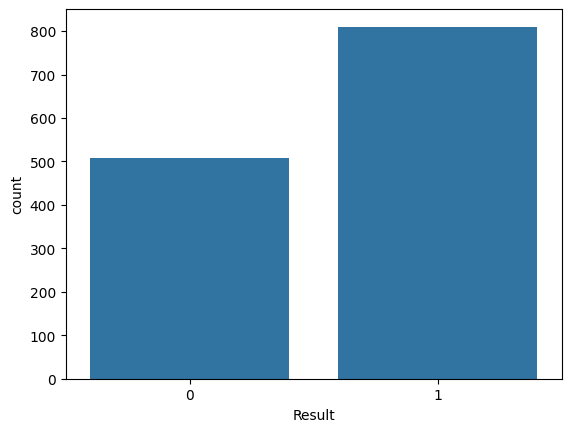

In [ ]:
sns.countplot(data=data, x='Result')

show sex plot

<Axes: xlabel='Gender', ylabel='count'>

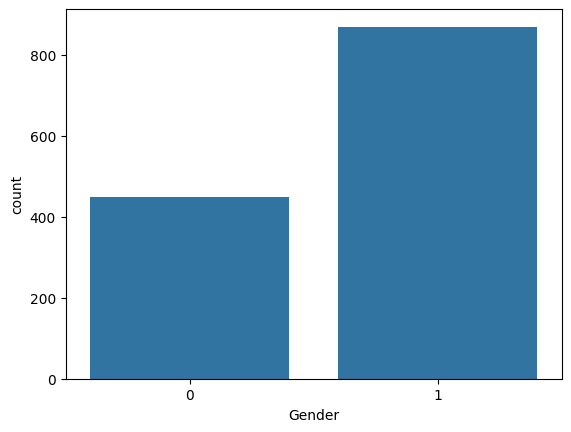

In [ ]:
sns.countplot(data=data, x='Gender')

show age histogram

<Axes: >

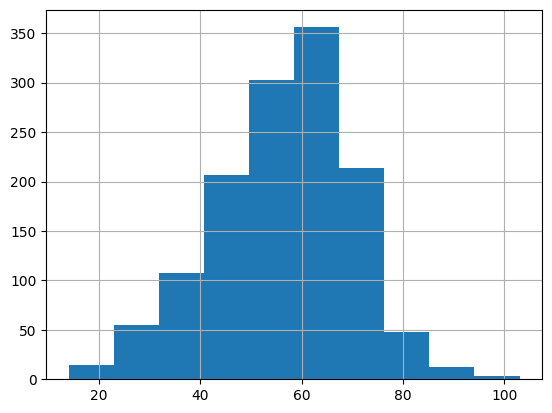

In [ ]:
data['Age'].hist()

x = access to all rows and all columns except last column,
y = access to all rows and all last column

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

show dataframe size

In [ ]:
np.shape(X)

(1319, 8)

split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train,y_train)

MLPClassifier()

predict data

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       154
           1       0.78      0.84      0.81       242

    accuracy                           0.76       396
   macro avg       0.75      0.74      0.74       396
weighted avg       0.76      0.76      0.76       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 97,  57],
       [ 38, 204]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')


train sacore : 0.7735644637053087 
test score : 0.76010101010101


KNN algorithm

5 neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48       154
           1       0.67      0.70      0.69       242

    accuracy                           0.61       396
   macro avg       0.58      0.58      0.58       396
weighted avg       0.60      0.61      0.61       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 71,  83],
       [ 72, 170]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')

train sacore : 0.7724810400866738 
test score : 0.6085858585858586


7 neighbours

In [ ]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       154
           1       0.70      0.74      0.72       242

    accuracy                           0.64       396
   macro avg       0.62      0.62      0.62       396
weighted avg       0.64      0.64      0.64       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 76,  78],
       [ 63, 179]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')

train sacore : 0.7313109425785482 
test score : 0.6439393939393939


3 neighbours

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       154
           1       0.67      0.69      0.68       242

    accuracy                           0.60       396
   macro avg       0.58      0.58      0.58       396
weighted avg       0.60      0.60      0.60       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 73,  81],
       [ 76, 166]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')

train sacore : 0.8114842903575298 
test score : 0.6035353535353535


9 neighbours

In [ ]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.46      0.49       154
           1       0.68      0.74      0.71       242

    accuracy                           0.63       396
   macro avg       0.60      0.60      0.60       396
weighted avg       0.62      0.63      0.62       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 71,  83],
       [ 64, 178]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')

train sacore : 0.71397616468039 
test score : 0.6287878787878788


SVC algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(C=15, kernel='linear') #random_state
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       154
           1       0.88      0.82      0.85       242

    accuracy                           0.82       396
   macro avg       0.81      0.82      0.82       396
weighted avg       0.83      0.82      0.82       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[127,  27],
       [ 43, 199]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')

train sacore : 0.8147345612134345 
test score : 0.8232323232323232


In [ ]:
metrics.precision_recall_fscore_support(y_test, y_pred)

(array([0.74705882, 0.88053097]),
 array([0.82467532, 0.82231405]),
 array([0.78395062, 0.85042735]),
 array([154, 242]))

In [ ]:
metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8286251373705825, 0.8232323232323232, 0.8245752875382506, None)

In [ ]:
clf = SVC(C=15, kernel='poly') #random_state
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       154
           1       0.79      0.82      0.80       242

    accuracy                           0.76       396
   macro avg       0.74      0.74      0.74       396
weighted avg       0.75      0.76      0.75       396



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[101,  53],
       [ 44, 198]])

In [ ]:
print(f'train sacore : {clf.score(X_train,y_train)} \ntest score : {clf.score(X_test,y_test)}')

train sacore : 0.7475622968580715 
test score : 0.7550505050505051


In [ ]:
metrics.precision_recall_fscore_support(y_test, y_pred)

(array([0.69655172, 0.78884462]),
 array([0.65584416, 0.81818182]),
 array([0.67558528, 0.80324544]),
 array([154, 242]))

In [ ]:
metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7529529392010502, 0.7550505050505051, 0.7535998215070444, None)

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma'  : ['scale', 'auto'],
    'degree' : [1, 2,3,4]
}

gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)


gsh.fit(X_train, y_train)
print(gsh.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


**show the best model**

In [ ]:
gsh.best_estimator_

In [ ]:
gsh.best_score_

In [ ]:
gsh.best_params_

In [ ]:
svc = SVC(C=1, gamma='auto', kernel='linear')
svc.fit(X, y)

**decision tree**

In [ ]:
from   sklearn.tree             import  DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
y_test == y_pred

In [ ]:
from   sklearn.metrics          import  confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from   sklearn.metrics          import  classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from   sklearn  import  tree
import graphviz
d = tree.export_graphviz(clf, class_names=y, feature_names=['Age',	'Gender',	'Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin'])
graphviz.Source(d)